In [7]:
!pip install mpld3

  Obtaining dependency information for mpld3 from https://files.pythonhosted.org/packages/95/6a/e3691bcc47485f38b09853207c928130571821d187cf174eed5418d45e82/mpld3-0.5.10-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas.tools import plotting
plt.style.use("ggplot")
from scipy import stats
import time
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
import plotly.express as px
import plotly.graph_objects as go

## Importing the dataset

In [107]:
# Load the dataset
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [108]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Features

1. ID number

2. Diagnosis (M = malignant, B = benign)

3. radius (mean of distances from center to points on the perimeter)

4. texture (standard deviation of gray-scale values)

5. perimeter

6. area

7. smoothness (local variation in radius lengths)

8. compactness (perimeter^2 / area - 1.0)

9. concavity (severity of concave portions of the contour)

10. concave points (number of concave portions of the contour)

11. symmetry

12. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


## Feature Definitions:

Sure, let's break down these features in the context of breast cancer prediction:

Diagnosis (M = malignant, B = benign): This is the target variable or dependent variable in the dataset. It indicates whether a particular instance (such as a patient or a tissue sample) is diagnosed as malignant (cancerous) or benign (non-cancerous).

Radius (mean of distances from center to points on the perimeter): This feature represents the average distance from the center of the mass of a cell nucleus to points on its boundary. In the context of breast cancer, it's a measure related to the size of the cell nuclei.

Texture (standard deviation of gray-scale values): Texture refers to the variation in pixel intensities in the image. In medical imaging like mammograms, it can indicate variations in tissue density, which may be relevant for identifying cancerous regions.

Perimeter: This is the total length of the boundary of the cell nucleus. It's related to the size and shape of the nucleus.

Area: Area refers to the total area enclosed by the boundary of the cell nucleus. It's another measure related to the size of the nucleus.

Smoothness (local variation in radius lengths): Smoothness measures how much the radius lengths of the cell nuclei vary locally. High smoothness indicates a more uniform shape, while low smoothness may indicate irregularities that could be associated with cancer.

Compactness (perimeter^2 / area - 1.0): Compactness is a measure of how compact or dense the shape of the cell nucleus is. A higher compactness value suggests a shape that is less spread out or more compact, relative to its area.

Concavity (severity of concave portions of the contour): Concavity measures the severity of concave regions within the boundary of the cell nucleus. It can indicate irregularities or deformations in the shape of the nucleus.
Concave points (number of concave portions of the contour): This feature counts the number of concave regions within the boundary of the cell nucleus. It's related to concavity but gives a quantitative measure of the number of such regions.

Symmetry: Symmetry refers to how symmetric or asymmetric the cell nuclei are. In the context of breast cancer, irregularities in symmetry may be indicative of abnormalities.

Fractal dimension ("coastline approximation" - 1): Fractal dimension is a measure of the complexity of the boundary of the cell nucleus. It's like a mathematical way of describing how "wiggly" or irregular the boundary is, similar to how the coastline of a country might have more detail as you zoom in closer.


## Quick look at the data

In [111]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 3 things that take our attention: 

1) There is an id that cannot be used for classificaiton 

2) Diagnosis is our class label 

3) Unnamed: 32 feature includes NaN so we do not need it.

Therefore, drop these unnecessary features.

In [78]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

## Exploring the data

In [112]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Splitting the data into dependent and independent variables

In [80]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B 
x = df.drop(['diagnosis'],axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
# Define a color palette for each class
color_palette = px.colors.qualitative.Set2

# Create the count plot using Plotly
fig = px.bar(df, x='diagnosis', color='diagnosis', color_discrete_sequence=color_palette,
             title='Count Plot for Diagnosis')

# Update the axis labels
fig.update_xaxes(title_text='Diagnosis')
fig.update_yaxes(title_text='Count')

# Show the plot
fig.show()

## Violin Plots for the 'mean' attributes

In [86]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization

# Combine the data
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data_melted = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

# Create the violin plot using Plotly
fig = px.violin(data_melted, x="features", y="value", color="diagnosis", box=True, points="all",
                title="Violin Plot for First Ten Features")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

We can see that:

radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean have well defined and seperated means for the two classes of diagnosis, in comparison to , smoothness_mean, symmetry_mean, fractal_dimension_mean. This entails that the former variables are better classifiers as compared to the latter variables.

## Violin Plots for the 'standard error' attributes

In [87]:
# Combine the data for the second ten features
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis=1)
data_melted = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

# Create the violin plot using Plotly
fig = px.violin(data_melted, x="features", y="value", color="diagnosis", box=True, points="all",
                title="Violin Plot for Second Ten Features")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

We can see that,

radius_se, perimeter_se, area_se, compactness_se, concavity_se, concave_points_se have well defined and seperated means for the two classes of diagnosis, in comparison to, smoothness_se, symmetry_se, fractal_dimension_se, texture_se. This entails that the former variables are better classifiers as compared to the latter variables.

## Violin Plots for the 'worst' attributes

In [88]:
# Combine the data for the third set of ten features
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis=1)
data_melted = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

# Create the violin plot using Plotly
fig = px.violin(data_melted, x="features", y="value", color="diagnosis", box=True, points="all",
                title="Violin Plot for Third Ten Features")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

We can see that:

radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst have well defined and seperated means for the two classes of diagnosis, in comparison to , symmetry_worst and fractal_dimension_worst. This entails that the former variables are better classifiers as compared to the latter variables.

## Correlation Heatmap

In [91]:
# Create the correlation heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=x.corr(),
    x=x.columns,
    y=x.columns,
    colorscale='Viridis',  # Choose a colorscale that you prefer
    colorbar=dict(title='Correlation'),
    hoverongaps=False))

# Update layout for better presentation
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    width=900,
    height=800)

# Show the plot
fig.show()

## Extracting the highly correlated variables

In [92]:
correlation_matrix = x.corr()

# Identify pairs with high correlation (threshold set to 0.7)
high_correlation_pairs = []
threshold = 0.85
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j])
            )

# Display high correlation pairs
print("Pairs of variables with high correlation (above", threshold, "):")
for pair in high_correlation_pairs:
    print(pair)

# Plotting the correlation matrix using Plotly
fig = px.imshow(correlation_matrix, labels=dict(x="Variables", y="Variables", color="Correlation"),
                x=correlation_matrix.columns, y=correlation_matrix.columns,
                color_continuous_scale='Viridis', zmin=-1, zmax=1)

# Highlighting high correlation pairs
for pair in high_correlation_pairs:
    fig.add_shape(type="line",
                  x0=pair[0], y0=pair[1], x1=pair[1], y1=pair[0],
                  line=dict(color="red", width=2))

fig.update_layout(title="Correlation Matrix with High Correlation Pairs",
                  width=800, height=600)

fig.show()

Pairs of variables with high correlation (above 0.85 ):
('radius_mean', 'perimeter_mean')
('radius_mean', 'area_mean')
('radius_mean', 'radius_worst')
('radius_mean', 'perimeter_worst')
('radius_mean', 'area_worst')
('texture_mean', 'texture_worst')
('perimeter_mean', 'area_mean')
('perimeter_mean', 'concave points_mean')
('perimeter_mean', 'radius_worst')
('perimeter_mean', 'perimeter_worst')
('perimeter_mean', 'area_worst')
('area_mean', 'radius_worst')
('area_mean', 'perimeter_worst')
('area_mean', 'area_worst')
('compactness_mean', 'concavity_mean')
('compactness_mean', 'compactness_worst')
('concavity_mean', 'concave points_mean')
('concavity_mean', 'concavity_worst')
('concavity_mean', 'concave points_worst')
('concave points_mean', 'perimeter_worst')
('concave points_mean', 'concave points_worst')
('radius_se', 'perimeter_se')
('radius_se', 'area_se')
('perimeter_se', 'area_se')
('radius_worst', 'perimeter_worst')
('radius_worst', 'area_worst')
('perimeter_worst', 'area_worst')


## Looking deeper into radius_worst, perimeter_worst, area_worst

In [102]:
data = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
data

,radius_worst,perimeter_worst,area_worst
0,25.380,184.60,2019.0
1,24.990,158.80,1956.0
2,23.570,152.50,1709.0
3,14.910,98.87,567.7
4,22.540,152.20,1575.0
...,...,...,...
564,25.450,166.10,2027.0
565,23.690,155.00,1731.0
566,18.980,126.70,1124.0
567,25.740,184.60,1821.0


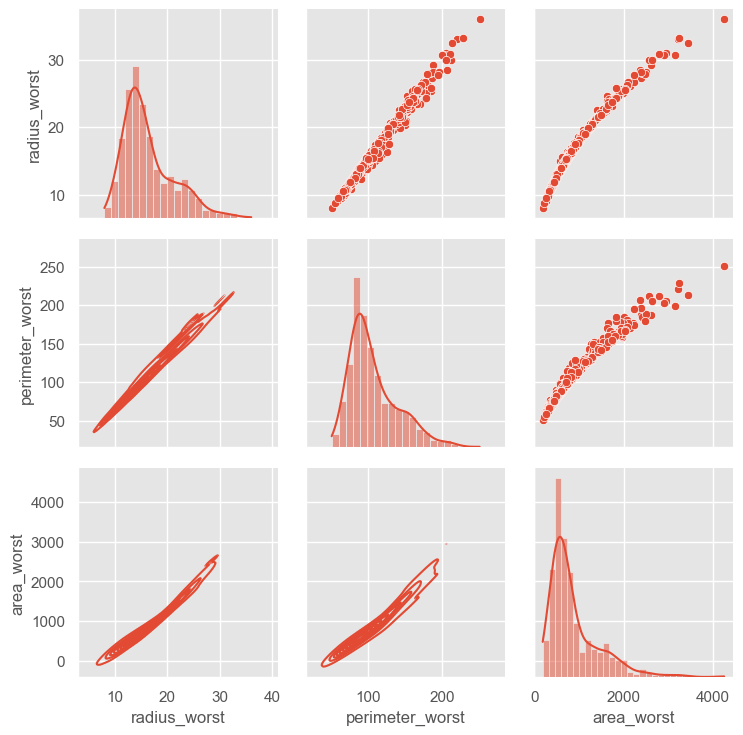

In [105]:
# Create a PairGrid using Seaborn
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)

# Convert PairGrid to a Plotly figure
fig = g.fig

# Update the layout of the Plotly figure
#fig.update_layout(title='PairGrid using Plotly')

# Show the Plotly figure
fig.show()